# **Colabユーザー向けの注意**

# **このファイルに直接書き込まないでください—作業内容が消えるかもしれません！**

# **必ず作業を始める前にコピーを作成してください。**

コピーの作り方

1. 左上の「File」をクリック。  
> *もし「File」や「Runtime」などのメニューが見当たらないときは、右上の「v」マークをクリックして表示してください。*

2. 「Save a copy in Drive」を選択。

3. コピーしたファイル名を「YOURNAMEs_FileName.ipynb」に変更。  
> 例：名前がOliviaなら Olivias_FileName.ipynb にする

---

* チェックマーク（✅）は保存されません。Chromeのリロードボタンでページを更新すると消えます。  
途中で作業をやめて戻るときは、テキストセルに「SO FAR DONE」などと書いておくと便利です。

---

* Colabでは**30～90分ごとに以前の出力がリセットされます**。  
  そのため、`~~ is not defined` のようなエラーが**頻繁に起きます**。

  🔁 `~~ is not defined` エラーが出たときの対処法  
  1. まず、変数名が正しく綴られているか確認。  
  2. 正しくてもエラーが出るなら、**もう一度実行し直したいセルをクリック。**  
  3. 左上の「Runtime」→「Run before」をクリック。  
    → これで**前のすべてのセルが再実行されます**。  
  4. もう一度、セルを実行してください。

  これでもエラーが続く場合、  
  以前のセルのTODO回答に基本的な間違いがあるかもしれません。  
  回答を見直すか、ChatGPTや他のコーディングアシスタントに聞いてみてください。

# **Chapter 1: Dataloader**

テキストはそのままじゃ扱えないんだ。<br>
だから、テキストを数値に変換しよう。<br>
この章では、各文字にユニークなIDを割り当てるよ。<br>
ちょっと面倒かもしれないけど、頑張ろう！

### **Section 0: Preparation**

このセクションは、前のチャプターの内容を読み込むだけです。<br>
コードを実行するだけでOK、読まなくても大丈夫です。<br>
遠慮なく先に進んでください。<br>

In [ ]:
!wget https://raw.githubusercontent.com/HayatoHongo/Everyones_nanoGPT/main/input.txt -O input.txt

# utf-8でダウンロードしたinput.textを読み込む。
with open("input.txt", 'r', encoding = 'utf-8') as f:
    text = f.read()

--2025-07-03 05:14:42--  https://raw.githubusercontent.com/HayatoHongo/nanoGPT_todo/main/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.04s   

2025-07-03 05:14:42 (27.0 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [ ]:
# テンソルを見やすく表示する関数（スキップ可）

import torch
import torch.nn as nn

def print_formatted_tensor(*args, width=6, decimals=2):
    """
    
    A function that neatly formats and displays a PyTorch Tensor, and also prints its size.

    Example usage:
        print_formatted_tensor("名前", tensor)
        print_formatted_tensor(tensor)

    Args:
        *args: If given 1 argument, it is treated as a tensor.
               If given 2 arguments, the first is treated as the name, the second as the tensor.
        width (int): Display width for each number (default: 6)
        decimals (int): Number of decimal places to show (default: 2)
    """
    

    # 引数からテンソルと名前を判定する
    if not args:
        raise ValueError("At least one argument is required.")
    if isinstance(args[0], str):
        if len(args) < 2:
            raise ValueError("Tensor is not specified.")
        name, tensor = args[0], args[1]
    else:
        name, tensor = None, args[0]

    # Tensorをリストに変換する
    tensor_list = tensor.detach().cpu().tolist()

    def format_list(lst, indent):
        """再帰的ネストリストを整形し文字列で返す"""
        # 内容がリストなら再度返す
        if isinstance(lst, list) and lst and isinstance(lst[0], list):
            inner = ",\n".join(" " * indent + format_list(sub, indent + 2) for sub in lst)
            return "[\n" + inner + "\n" + " " * (indent - 2) + "]"
        # 数字リスト用
        return "[" + ", ".join(f"{v:{width}.{decimals}f}" for v in lst) + "]"

    # 書式付き文字列（最外枠の角括弧を除く）
    formatted = format_list(tensor_list, indent=9)
    inner_formatted = formatted[1:-1].strip()

    # 結果出力
    if name:
        print(name)
    print(f"Tensor Size: {list(tensor.size())}")
    print("tensor([")
    print(" " * 9 + inner_formatted)
    print(" " * 7 + "])")

### **Section 1: __init__(1)**

**まずは、例文「Hello World!」の文字をリストにしてみましょう。**  
- 入力: 'Hello World!'  
- 出力: [' ', '!', 'H', 'W', 'd', 'e', 'l', 'o', 'r']

[Watch the video!](https://youtu.be/PTbVZC-R2kY)
- 10秒、音声なし

In [ ]:
# Colabユーザーはこのコードを実行して動画を視聴できます。
from IPython.display import HTML
video_id = "PTbVZC-R2kY"
HTML(f"""<div style="text-align: center;"><iframe width="700" height="300"
        src="https://www.youtube.com/embed/{video_id}?autoplay=0&modestbranding=1&showinfo=0&rel=0&controls=1"
        frameborder="0" allowfullscreen></iframe></div>""")

- 文字列 'Hello World!' を変数 `example_text` に格納してください。

In [ ]:
example_text = 'Hello World!' # TODO: 文字列 'Hello World!' を格納します。簡単な作業です。
print("例文：", example_text)

Example text: Hello World!


**`Check Point`** <label><input type="checkbox">例文：Hello World!

「!」が含まれていて、「,」や他の余分な文字が入っていないことを確認してください。
</label>

```
関数: set
引数: example_text
```

- `set` 関数は文字列から重複しない要素を取り出します。

In [ ]:
unique_chars = set(example_text) # TODO: 文字列からユニーク要素を抽出する。
print("ユニークな文字:", unique_chars)

Unique characters: {' ', '!', 'W', 'd', 'H', 'r', 'l', 'e', 'o'}


```
関数: list
引数: 自分で考える
```

- `list` 関数は をリストに変換します。

In [ ]:
listed_chars = list(unique_chars) # TODO: データをリストに変換します。
print("リストにある文字：", listed_chars)

Listed characters: [' ', '!', 'W', 'd', 'H', 'r', 'l', 'e', 'o']


```
関数: sorted
引数: 自分で考えろ
```
- `sorted`関数はデータを昇順に並べ替えます。

In [ ]:
sorted_chars = sorted(listed_chars) # TODO: 昇順に並べ替え。
print("ソート済み文字:",sorted_chars)

Sorted characters: [' ', '!', 'H', 'W', 'd', 'e', 'l', 'o', 'r']


感嘆符を必ず入れて、全部で9つの要素にしてください！

In [ ]:
print(len(sorted_chars))

9


**`Check Point`** <label><input type="checkbox" id="task1"> ソート済みの文字: [' ', '!', 'H', 'W', 'd', 'e', 'l', 'o', 'r']</label>

念のため、もう一度振り返ってみましょう。

シェイクスピアの全文を読み込みます。

In [ ]:
!wget https://raw.githubusercontent.com/HayatoHongo/Everyones_nanoGPT/main/input.txt -O input.txt

# ダウンロードしたinput.textをutf-8で読み込む。
with open("input.txt", 'r', encoding = 'utf-8') as f:
    text = f.read()

--2025-07-03 05:31:48--  https://raw.githubusercontent.com/HayatoHongo/nanoGPT_todo/main/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.03s   

2025-07-03 05:31:48 (33.2 MB/s) - ‘input.txt’ saved [1115394/1115394]



- Shakespeareの全文`text`に対して、`set`、`list`、`sorted`を適用します。<br>
これで`chars`という文字のリストが作成されます。

In [ ]:
unique_chars_text = set(text) # TODO: 設定する
listed_chars_text = list(unique_chars_text) # TODO: リスト
chars = sorted(listed_chars_text) # TODO: ソート済み
print('文字数：', chars)

Characters: ['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


**`Check Point`** &nbsp; <label><input type="checkbox" id="task1">

文字一覧: ['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
</label>

```
関数: len
引数: 自分で考えて
```
- `len` はリストの長さを表示します。

In [ ]:
# charsリストの文字数を調べる
vocab_size = len(chars) # TODO: リストnameの長さ
print("文字の語彙数は：", vocab_size)

Vocabulary size of chars is: 65


**`Check Point`** <label><input type="checkbox" id="task1"> 文字の語彙数は65です</label>

**Chapter1: Section 1: __init__** <label><input type="checkbox"> Mark as Done</label>

##### **重要⚠️**

Colabでは、チェックポイントのチェックマークは現在のランタイムセッションでのみ保持されます。

後で再起動すると、チェックマークは消えてしまいます。

進捗を残すために、テキストセルを追加して「ここまで完了！」などとメモしておくといいですよ。

### **Section 2: Encode**

このセクションでは、次のことをしたいと思います…

**文字列をIDに変換する**  
  - 入力（使う素材）：'Hello World!'  
  - 出力（期待する結果）：[2, 5, 6, 6, 7, 0, 3, 7, 8, 6, 4, 1]


**まず、テキストデータの文字をIDに変換するための辞書 `char_to_id` を作成しましょう。**

[Watch the video!](https://youtu.be/9yk4jsYl7mU)
- 25秒、音声なし
- video_id = "9yk4jsYl7mU"

In [ ]:
# Colabユーザーはこのコードで動画を再生できます。
from IPython.display import HTML
video_id = "9yk4jsYl7mU"
HTML(f"""<div style="text-align: center;"><iframe width="700" height="300"
        src="https://www.youtube.com/embed/{video_id}?autoplay=0&modestbranding=1&showinfo=0&rel=0&controls=1"
        frameborder="0" allowfullscreen></iframe></div>""")

```python
for index, char in enumerate(Think_for_yourself):
    print(f"Index: {index}, Character: {char}")
```
`enumerate`はリストから位置`index`と要素`char`のペアを一つずつ生成します。


In [ ]:
# 文字例として「Hello World!」をリストで示します。
example_chars = [' ', '!', 'H', 'W', 'd', 'e', 'l', 'o', 'r']

for index, char in enumerate(example_chars): # TODO: インデックスと要素を同時生成
    print(f"index:{index}, char:{char}") # 作成されたペアを表示

index:0, char: 
index:1, char:!
index:2, char:H
index:3, char:W
index:4, char:d
index:5, char:e
index:6, char:l
index:7, char:o
index:8, char:r


**`Check Point`** <label><input type="checkbox"> ← 上の結果が以下の答えと一致したらチェックしてください

index:0, char: <br>
index:1, char:!<br>
index:2, char:H<br>
index:3, char:W<br>
index:4, char:d<br>
index:5, char:e<br>
index:6, char:l<br>
index:7, char:o<br>
index:8, char:r<br>
</label>

**今回は、文字リストのインデックスをその文字を表すIDとして扱います。**

```python
# 文字からインデックスへの辞書を作成する
char_to_id = {
    char: index for index, char in enumerate(THINK_FOR_YOURSELF)
}
```

- `character_list`から順番 `index` と対応する `char` を一緒に取り出し、{`char`: `index`} のペアで辞書を作る。

In [ ]:
# TODO: 文字をインデックスにマッピングする辞書を作成する
char_to_id = {
    char: index for index, char in enumerate(example_chars)
}

print('文字からインデックスへの辞書:\n', char_to_id)

Character to index dictionary:
 {' ': 0, '!': 1, 'H': 2, 'W': 3, 'd': 4, 'e': 5, 'l': 6, 'o': 7, 'r': 8}


```python
for char in example_text:
    print(char)  # 現在処理中の文字
    print(char_to_id[char])  # charに対応するID番号
```
'Hello World!'を辞書char_to_idを使ってID番号の列に変換しましょう。

順番に`char`を取り出します。例えば`H`、`e`などです。

それから辞書`char_to_id`を使って、`char`をその文字を表すインデックス（ID番号）に変換します。

In [ ]:
example_text = 'Hello World!'

# TODO: example_text 'Hello World'をchar_to_idで数値化する
for char in example_text:
    print(char) # TODO: 現在処理中の文字
    print(char_to_id[char]) # TODO: 文字charに対応するID番号

H
2
e
5
l
6
l
6
o
7
 
0
W
3
o
7
r
8
l
6
d
4
!
1


```python
def encode(string):
    chars_encoded_list = [ char_to_id[char] for char in string ]
    return chars_encoded_list
```

* 文字列を受け取ってIDのリストに変換する`encode`関数を作りましょう。
* 文字列の各文字`char`に対して`char_to_id[char]`でIDを取得し、リストに入れます。  
* 最後に、文字列の全ての文字をIDに変えたリストを返します。

In [ ]:
def encode(string): # 文字列データを引数で受け取る
    chars_encoded_list = [ char_to_id[char] for char in string] # TODO: 文字列string内の全文字を順にIDに変換します。char_to_idを使えます。
    return chars_encoded_list

# 文字列にexample_text('Hello World!')を使う。
example_text_encoded = encode(example_text)
print('Hello World! をIDに変換しました:', example_text_encoded)

Converted Hello World! into IDs: [2, 5, 6, 6, 7, 0, 3, 7, 8, 6, 4, 1]


Check Point<label><input type="checkbox">「Hello World!」をIDに変換しました：[2, 5, 6, 6, 7, 0, 3, 7, 8, 6, 4, 1]</label>

**Chapter1: Section2: "Encode"** <label><input type="checkbox"> Mark as Done</label>

### **Section 3: Decode**

このセクションでは、私たちは…

**ID番号の列から文字列を再構築する**  
  - 入力（使う材料）：[2, 5, 6, 6, 7, 0, 3, 7, 8, 6, 4, 1]  
  - 出力（目指す結果）：'Hello World!'  

---

```python
id_to_char = { index:char for index, char in enumerate(example_chars) }
```

- `example_chars`から、各`index`とそれに対応する`char`を同時に取り出して、{`index`: `char`}のペアにした辞書を作成します。

In [ ]:
# character_listには「Hello World」の文字が昇順で入っています。
example_chars = [' ', '!', 'H', 'W', 'd', 'e', 'l', 'o', 'r']

id_to_char = { index: char for index, char in enumerate(example_chars)} # TODO: {index: char}の組み合わせで辞書を作成する
print('ID番号を文字に変換する辞書', id_to_char)

Dictionary that converts ID numbers to characters {0: ' ', 1: '!', 2: 'H', 3: 'W', 4: 'd', 5: 'e', 6: 'l', 7: 'o', 8: 'r'}


```python
for id in ID_number_list:
    print(id)  # 現在処理中のID
    print(THINK_FOR_YOURSELF)  # 辞書id_to_charを使って、ID `id` に対応する文字を出力します。ヒント：前のセクション
```
* `ID_number_list`から1つずつID `id` を取り出し、辞書`id_to_char`で対応する文字に変換します。

In [ ]:
# ID番号欄は前節で得た'Hello World!'のID番号を使います。
example_ids = [2, 5, 6, 6, 7, 0, 3, 7, 8, 6, 4, 1]

for id in example_ids:
    print(id) # 現在処理中のID番号
    print(id_to_char[id]) # TODO: ID番号idの文字を表示する

2
H
5
e
6
l
6
l
7
o
0
 
3
W
7
o
8
r
6
l
4
d
1
!


```python
def decode(ids):
    ids_decoded_list =  # IDを文字に変換します。ヒント：前のセクション参照
    return ids_decoded_list
```
- `decode`関数は、idsを入力として受け取り文字列を復元します。
- `ids`の中の各IDを順番に処理します。<br>
それぞれのIDに対して`id_to_char[id]`を使い文字を取得します。<br>
取得した文字をリストに追加します。<br>
IDから変換されたすべての文字が入ったリストを返します。

In [ ]:
def decode(ids):
    ids_decoded_list = [id_to_char[id] for id in ids] # TODO: IDを文字に変換します。ヒント：前節
    return ids_decoded_list

前のセクションで使ったID番号をID番号の列に使ってください：[2, 5, 6, 6, 7, 0, 3, 7, 8, 6, 4, 1] が「Hello World!」のものです。これらのIDから文字を復元できるか、`decode`関数で確認してみましょう。

In [ ]:
example_ids = [2, 5, 6, 6, 7, 0, 3, 7, 8, 6, 4, 1]
example_ids_decoded = decode(example_ids)
print('[2, 5, 6, 6, 7, 0, 3, 7, 8, 6, 4, 1]を文字に変換する', example_ids_decoded)

Convert [2, 5, 6, 6, 7, 0, 3, 7, 8, 6, 4, 1] to characters  ['H', 'e', 'l', 'l', 'o', ' ', 'W', 'o', 'r', 'l', 'd', '!']


```python
# char_listから各文字を取り出して文字列に変換する
ids_decoded_str_list = [str(char) for char in THINK_FOR_YOURSELF]
```
- 復号された文字のリストから一文字ずつ取り出し、`str`型に変換します。

In [ ]:
ids_decoded_str_list = [str(char) for char in example_ids_decoded] # TODO: デコード済み文字をstr型に変換する
print(ids_decoded_str_list)

['H', 'e', 'l', 'l', 'o', ' ', 'W', 'o', 'r', 'l', 'd', '!']


```python
# それぞれの文字（`）の囲みを外して結合する。
ids_decode_joined_string = ''.join(THINK_FOR_YOURSELF)
```
- これはリストから一文字ずつ取り出して、<br>
  囲みのクォートを外し、つなげている。

In [ ]:
ids_decoded_joined_string = ''.join(ids_decoded_str_list) # TODO: 文字を囲む''を外してつなげる。
print(ids_decoded_joined_string)

Hello World!


これまでの流れをまとめて、ID列からテキストを再構築する `decode` 関数を作成しましょう。

```python
def decode(ids):
    # ID列を文字列リストに変換する
    ids_decoded_list =
    # 文字列リストから1文字ずつ取り出し、str型に変換する
    ids_decoded_str_list =
    # 文字の周りのクォートを取り除き、1つの文字列に結合する
    ids_decode_joined_string =
    return ids_decode_joined_string
```
- `string list`の各文字`char`を順に取り出し、`str`型に変換して、<br>文字の周りのクォート`''`を外しながらつなげる。

In [ ]:
def decode(ids):
    ids_decoded_list = [id_to_char[id] for id in ids] # TODO: ID文字列を文字列に変換します。id_to_charを使えます
    ids_decoded_str_list = [str(char) for char in ids_decoded_list] # TODO: 各要素の文字charを順に取り出し、str型に変換します
    ids_decode_joined_string = ''.join(ids_decoded_str_list) # TODO: 文字の周りの''を外してつなげる。
    return ids_decode_joined_string

# example_ids、[2, 5, 6, 6, 7, 0, 3, 7, 8, 6, 4, 1]をID番号列として使う。
example_ids_decoded_joined_str = decode(example_ids)
print('[2, 5, 6, 6, 7, 0, 3, 7, 8, 6, 4, 1] は文字列に変換されました', example_ids_decoded_joined_str)

[2, 5, 6, 6, 7, 0, 3, 7, 8, 6, 4, 1] was converted into a string Hello World!


**`Preprocessing Chapter: Section 4 "IDを文字に変換する"`** <label><input type="checkbox" id="task1"> Mark as Done</label>

これまでの進捗

### **Section 4: __init__(2)**

念のため、復習しましょう。

シャクスピアの文章 `text` から取った文字を並べ替えたリスト `chars` を使います。  
中身を確認してみてください。

In [ ]:
print('文字:\n', chars)
print("chrasの語彙数", len(chars))

chars:
 ['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Vocabulary length of chras 65


```python
char_to_id = {char: index for index, char in enumerate(THINK_FOR_YOURSELF)}
```

- `index`と`char`を同時に取り出して、文字からIDへの辞書を作成します。
- この辞書は、各`char`とその`index`を{`char`: `index`}の形で対応づけています。

In [ ]:
# {char:indx}
char_to_id = {char: index for index, char in enumerate(chars)} # TODO: {char: index}の組み合わせで辞書を作成する
print('char_to_id', char_to_id)

char_to_id {'\n': 0, ' ': 1, '!': 2, '$': 3, '&': 4, "'": 5, ',': 6, '-': 7, '.': 8, '3': 9, ':': 10, ';': 11, '?': 12, 'A': 13, 'B': 14, 'C': 15, 'D': 16, 'E': 17, 'F': 18, 'G': 19, 'H': 20, 'I': 21, 'J': 22, 'K': 23, 'L': 24, 'M': 25, 'N': 26, 'O': 27, 'P': 28, 'Q': 29, 'R': 30, 'S': 31, 'T': 32, 'U': 33, 'V': 34, 'W': 35, 'X': 36, 'Y': 37, 'Z': 38, 'a': 39, 'b': 40, 'c': 41, 'd': 42, 'e': 43, 'f': 44, 'g': 45, 'h': 46, 'i': 47, 'j': 48, 'k': 49, 'l': 50, 'm': 51, 'n': 52, 'o': 53, 'p': 54, 'q': 55, 'r': 56, 's': 57, 't': 58, 'u': 59, 'v': 60, 'w': 61, 'x': 62, 'y': 63, 'z': 64}


**`Check Point`** <label><input type="checkbox" id="task1">

char_to_id {'\n': 0, ' ': 1, '!': 2, '$': 3, '&': 4, "'": 5, ',': 6, '-': 7, '.': 8, '3': 9, ':': 10, ';': 11, '?': 12, 'A': 13, 'B': 14, 'C': 15, 'D': 16, 'E': 17, 'F': 18, 'G': 19, 'H': 20, 'I': 21, 'J': 22, 'K': 23, 'L': 24, 'M': 25, 'N': 26, 'O': 27, 'P': 28, 'Q': 29, 'R': 30, 'S': 31, 'T': 32, 'U': 33, 'V': 34, 'W': 35, 'X': 36, 'Y': 37, 'Z': 38, 'a': 39, 'b': 40, 'c': 41, 'd': 42, 'e': 43, 'f': 44, 'g': 45, 'h': 46, 'i': 47, 'j': 48, 'k': 49, 'l': 50, 'm': 51, 'n': 52, 'o': 53, 'p': 54, 'q': 55, 'r': 56, 's': 57, 't': 58, 'u': 59, 'v': 60, 'w': 61, 'x': 62, 'y': 63, 'z': 64}

</label>

```python
id_to_char = { index:char for index, char in enumerate(THINK_FOR_YOURSELF) }
```

- `index`と`char`を同時に取り出し、順番の`index`と対応する`char`のペアで {`index`: `char`} の辞書を作成します。

In [ ]:
id_to_char = { index:char for index, char in enumerate(chars) } # TODO: {index: char}の組み合わせで辞書を作成する
print('id_to_char', id_to_char)

id_to_char {0: '\n', 1: ' ', 2: '!', 3: '$', 4: '&', 5: "'", 6: ',', 7: '-', 8: '.', 9: '3', 10: ':', 11: ';', 12: '?', 13: 'A', 14: 'B', 15: 'C', 16: 'D', 17: 'E', 18: 'F', 19: 'G', 20: 'H', 21: 'I', 22: 'J', 23: 'K', 24: 'L', 25: 'M', 26: 'N', 27: 'O', 28: 'P', 29: 'Q', 30: 'R', 31: 'S', 32: 'T', 33: 'U', 34: 'V', 35: 'W', 36: 'X', 37: 'Y', 38: 'Z', 39: 'a', 40: 'b', 41: 'c', 42: 'd', 43: 'e', 44: 'f', 45: 'g', 46: 'h', 47: 'i', 48: 'j', 49: 'k', 50: 'l', 51: 'm', 52: 'n', 53: 'o', 54: 'p', 55: 'q', 56: 'r', 57: 's', 58: 't', 59: 'u', 60: 'v', 61: 'w', 62: 'x', 63: 'y', 64: 'z'}


**`Check Point`**
<label><input type="checkbox" id="task1">

id_to_char {0: '\n', 1: ' ', 2: '!', 3: '$', 4: '&', 5: "'", 6: ',', 7: '-', 8: '.', 9: '3', 10: ':', 11: ';', 12: '?', 13: 'A', 14: 'B', 15: 'C', 16: 'D', 17: 'E', 18: 'F', 19: 'G', 20: 'H', 21: 'I', 22: 'J', 23: 'K', 24: 'L', 25: 'M', 26: 'N', 27: 'O', 28: 'P', 29: 'Q', 30: 'R', 31: 'S', 32: 'T', 33: 'U', 34: 'V', 35: 'W', 36: 'X', 37: 'Y', 38: 'Z', 39: 'a', 40: 'b', 41: 'c', 42: 'd', 43: 'e', 44: 'f', 45: 'g', 46: 'h', 47: 'i', 48: 'j', 49: 'k', 50: 'l', 51: 'm', 52: 'n', 53: 'o', 54: 'p', 55: 'q', 56: 'r', 57: 's', 58: 't', 59: 'u', 60: 'v', 61: 'w', 62: 'x', 63: 'y', 64: 'z'}

</label>

`encode`という関数を実装してください。この関数は、文章を1文字ずつ取り出してID番号のリストに変換します。

In [ ]:
# コードを読んで実行してください。
def encode(string):
  chars_encoded_list = [char_to_id[char] for char in string]
  return chars_encoded_list

example_encoded = encode("Let's he")
print(example_encoded)

[24, 43, 58, 5, 57, 1, 46, 43]


**`Check Point`**  
<label><input type="checkbox">[24, 43, 58, 5, 57, 1, 46, 43]  
</label>

ID番号の各要素を`str`型に変換し、`''`を取り除いて結合し、その後文章をデコードする関数を実装してください。

In [ ]:
# コードを読んで実行してください。
def decode(ids):
    decoded_ids = [str(id_to_char[id]) for id in ids]
    decoded_ids_joined_str = ''.join(decoded_ids)
    return decoded_ids_joined_str

example_decoded_joined_str = decode([24, 43, 58, 5, 57, 1, 46, 43])
print(example_decoded_joined_str)

Let's he


**`Check Point`**  
<label><input type="checkbox">Let's he
</label>

- input.txtのすべての文`text`を`encode`して、ID番号のリストに変換し、それを`text_ids`に保存しましょう。

In [ ]:
text_ids = encode(text) # TODO: 先に定義したencode関数を使う。
print(text_ids)

[18, 47, 56, 57, 58, 1, 15, 47, 58, 47, 64, 43, 52, 10, 0, 14, 43, 44, 53, 56, 43, 1, 61, 43, 1, 54, 56, 53, 41, 43, 43, 42, 1, 39, 52, 63, 1, 44, 59, 56, 58, 46, 43, 56, 6, 1, 46, 43, 39, 56, 1, 51, 43, 1, 57, 54, 43, 39, 49, 8, 0, 0, 13, 50, 50, 10, 0, 31, 54, 43, 39, 49, 6, 1, 57, 54, 43, 39, 49, 8, 0, 0, 18, 47, 56, 57, 58, 1, 15, 47, 58, 47, 64, 43, 52, 10, 0, 37, 53, 59, 1, 39, 56, 43, 1, 39, 50, 50, 1, 56, 43, 57, 53, 50, 60, 43, 42, 1, 56, 39, 58, 46, 43, 56, 1, 58, 53, 1, 42, 47, 43, 1, 58, 46, 39, 52, 1, 58, 53, 1, 44, 39, 51, 47, 57, 46, 12, 0, 0, 13, 50, 50, 10, 0, 30, 43, 57, 53, 50, 60, 43, 42, 8, 1, 56, 43, 57, 53, 50, 60, 43, 42, 8, 0, 0, 18, 47, 56, 57, 58, 1, 15, 47, 58, 47, 64, 43, 52, 10, 0, 18, 47, 56, 57, 58, 6, 1, 63, 53, 59, 1, 49, 52, 53, 61, 1, 15, 39, 47, 59, 57, 1, 25, 39, 56, 41, 47, 59, 57, 1, 47, 57, 1, 41, 46, 47, 43, 44, 1, 43, 52, 43, 51, 63, 1, 58, 53, 1, 58, 46, 43, 1, 54, 43, 53, 54, 50, 43, 8, 0, 0, 13, 50, 50, 10, 0, 35, 43, 1, 49, 52, 53, 61, 5, 

テキストが長すぎるので、最初の100文字だけ抽出しましょう。

In [ ]:
text_ids_100 = text_ids[0:100] # データの先頭から100文字。
print('100件のID\n', text_ids_100)

100 ids
 [18, 47, 56, 57, 58, 1, 15, 47, 58, 47, 64, 43, 52, 10, 0, 14, 43, 44, 53, 56, 43, 1, 61, 43, 1, 54, 56, 53, 41, 43, 43, 42, 1, 39, 52, 63, 1, 44, 59, 56, 58, 46, 43, 56, 6, 1, 46, 43, 39, 56, 1, 51, 43, 1, 57, 54, 43, 39, 49, 8, 0, 0, 13, 50, 50, 10, 0, 31, 54, 43, 39, 49, 6, 1, 57, 54, 43, 39, 49, 8, 0, 0, 18, 47, 56, 57, 58, 1, 15, 47, 58, 47, 64, 43, 52, 10, 0, 37, 53, 59]


```python
import torch
data = torch.tensor(THINK_FOR_YOURSELF, dtype=torch.long)
```

* PyTorchライブラリの`torch`をインポートします。
* IDのリストから型を`long`（整数）に指定してテンソル（PyTorchの数値データ構造）を作成します。

In [ ]:
# シェイクスピア全文をIDに変換し、Pytorchテンソルに変換して保存する
import torch # TODO: PyTorchライブラリtorchをインポートする
data = torch.tensor(text_ids) # TODO: 全IDをテンソルに変換して保存する
print('データ\n', data)

data
 tensor([18, 47, 56,  ..., 45,  8,  0])


**`Check Point`**  
<label><input type="checkbox" id="task1">シェイクスピアの全文をIDに変換し、それをPyTorchのテンソルに変換してデータとして保存する

 tensor([18, 47, 56,  ..., 45,  8,  0])
</label>

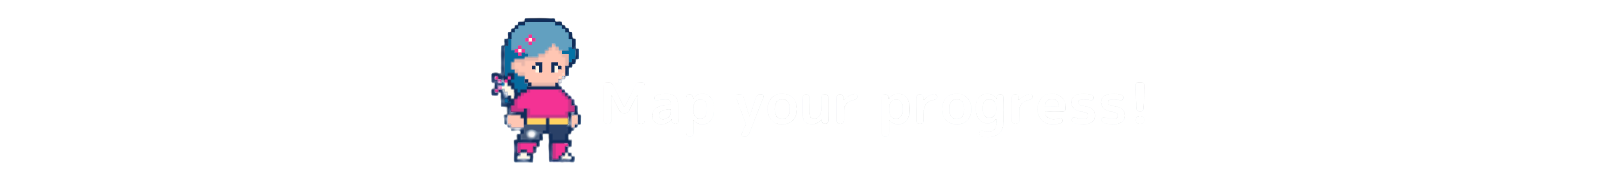

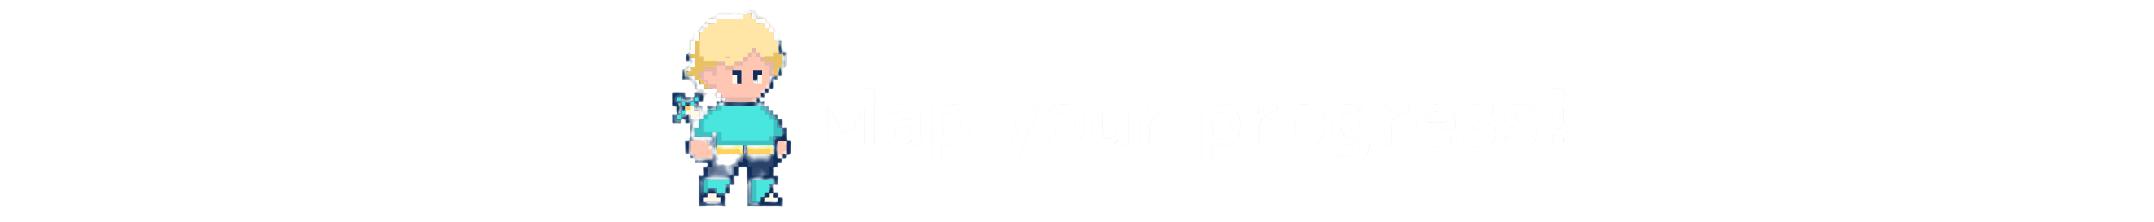

#### IMPORTANT⚠️

Chapter 0でTensor Mapを必ずコピーしておいてください。

まだの方はChapter 0の「How to Use this tutorial」セクションを確認してください。

[Watch the video!](https://youtu.be/-nQy8YespvQ)  
- 2分、音声なし  
- video_id = "-nQy8YespvQ"  


**部分スクリーンショット＆コピー**  

Macなら… `Cmd + Ctrl + Shift + 4`  
Windowsなら… `Windowsキー + Shift + S`  

**Canvaに貼り付け**  
Macなら… `Cmd + V`  
Windowsなら… `Ctrl + V`  

⚠️ 注意: Canvaに貼り付けると、画面シートの中央にペーストされます。  
そのため、画面から見えなくなることがあります！<br>  

シートの中央に移動してから、好きな場所にドラッグしてください。<br>  

コツ:<br>  
1 貼り付け前にズームアウトしてマップの中心を見せる。<br>  
2 貼り付け後はズームレベルを変えない。<br>  
3 スクリーンショットを大まかに正しい位置に動かす。<br>  
4 左上の角をドラッグして小さくリサイズ。<br>  
5 もう一度ズームアウトして微調整。<br>  
6 スライダーで画像を細かくずらす。<br>  
7 横スライダーは少し見づらいけど便利。<br>

**Chapter 1: Section 4** <label><input type="checkbox"> Mark as done</label>

### **Section 5: split_data**

Shakespeareのinput.txtの長さを測定してください（スペースを含むすべての文字をカウント）。

In [ ]:
print(len(data)) # TODO: データの長さを表示する

1115394


**`Check Point`** <label><input type="checkbox">1115394</label>

データを訓練セットと検証セットに9:1の割合で分割してください。


```python
split_index = int(THINK_FOR_YOURSELF)  # 分割ポイントのインデックス
train_data = data[:split_index]  # 左側を空欄にすると最初から
val_data = data[split_index:]  # 右側を空欄にすると最後まで
```
- データ全体の長さに学習データの割合（今回は0.9）を掛けて、  
  整数型（int）に変換し分割ポイントの `split_index` を求める。

- 最初から `split_index` の手前までを学習データ、  
  `split_index` から最後までを検証データとして使う。

In [ ]:
# すべてのデータを9:1で訓練用と検証用に分割する
split_index = int(len(data) * 0.9) # TODO: 分割点のインデックスを計算する。
train_data = data[:split_index] # TODO: 開始から `split_index` 直前までの学習データ（空白で表現）
val_data = data[split_index:]# TODO: `split_index`から末尾までの検証データ（空白で表示）

print('分割点インデックス', split_index)
print('訓練データの長さ', len(train_data))
print('検証データ長：', len(val_data))

Divided Point Index 1003854
Length of training data 1003854
Verification data length: 111540


**`Check Point`**  
<label><input type="checkbox"><br>
分割ポイントインデックス 1003854<br>
学習データの長さ 1003854<br>
検証データの長さ: 111540<br>
</label>

In [ ]:
print("train_data\n", train_data) # すべての訓練データを表示

train_data
 tensor([18, 47, 56,  ..., 43, 56, 43])


In [ ]:
print("val_data\n", val_data) # 検証データ全体を見る

val_data
 tensor([12,  0,  0,  ..., 45,  8,  0])


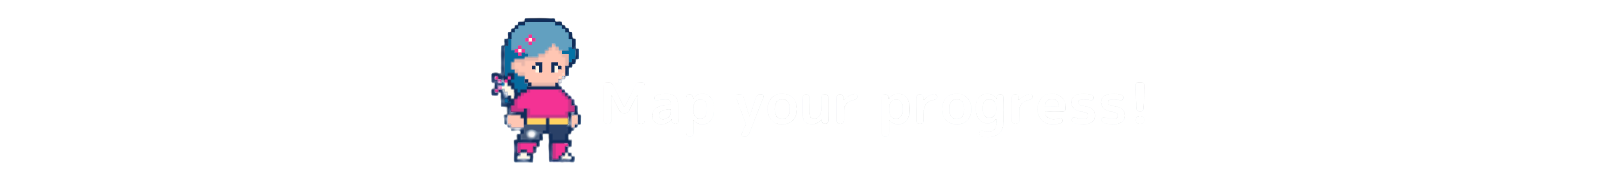

**Section 5: split_data** <label><input type="checkbox"> Mark as Done</label>

### **Section 6: get_batch**

**入力コンテキストと出力ターゲットのペアを作成する (1)**

すべてのAIモデルには入力と出力があります。では、言語モデルの入力と出力は何でしょうか？

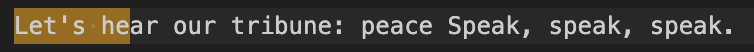

input.txtからランダムに8文字を抽出してください。たとえば、「Let's he」をサンプルとして使いましょう。

ここで作成する「バイグラム言語モデル」は、入力された文字列を受け取り、1文字ずらした文字列を出力します。

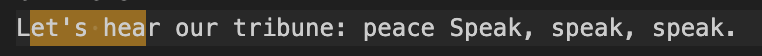

入力は8文字のシーケンスです。目的は、それぞれの文字の次に来る文字を予測することです。<br>
例えば、入力が「Let's he」なら、目標の出力は「et's hea」です。<br>
つまり、8文字の入力に対して、対応する8文字の出力を生成します。<br>
入力文字列も目標出力文字列も、単語IDとしてエンコードされています。

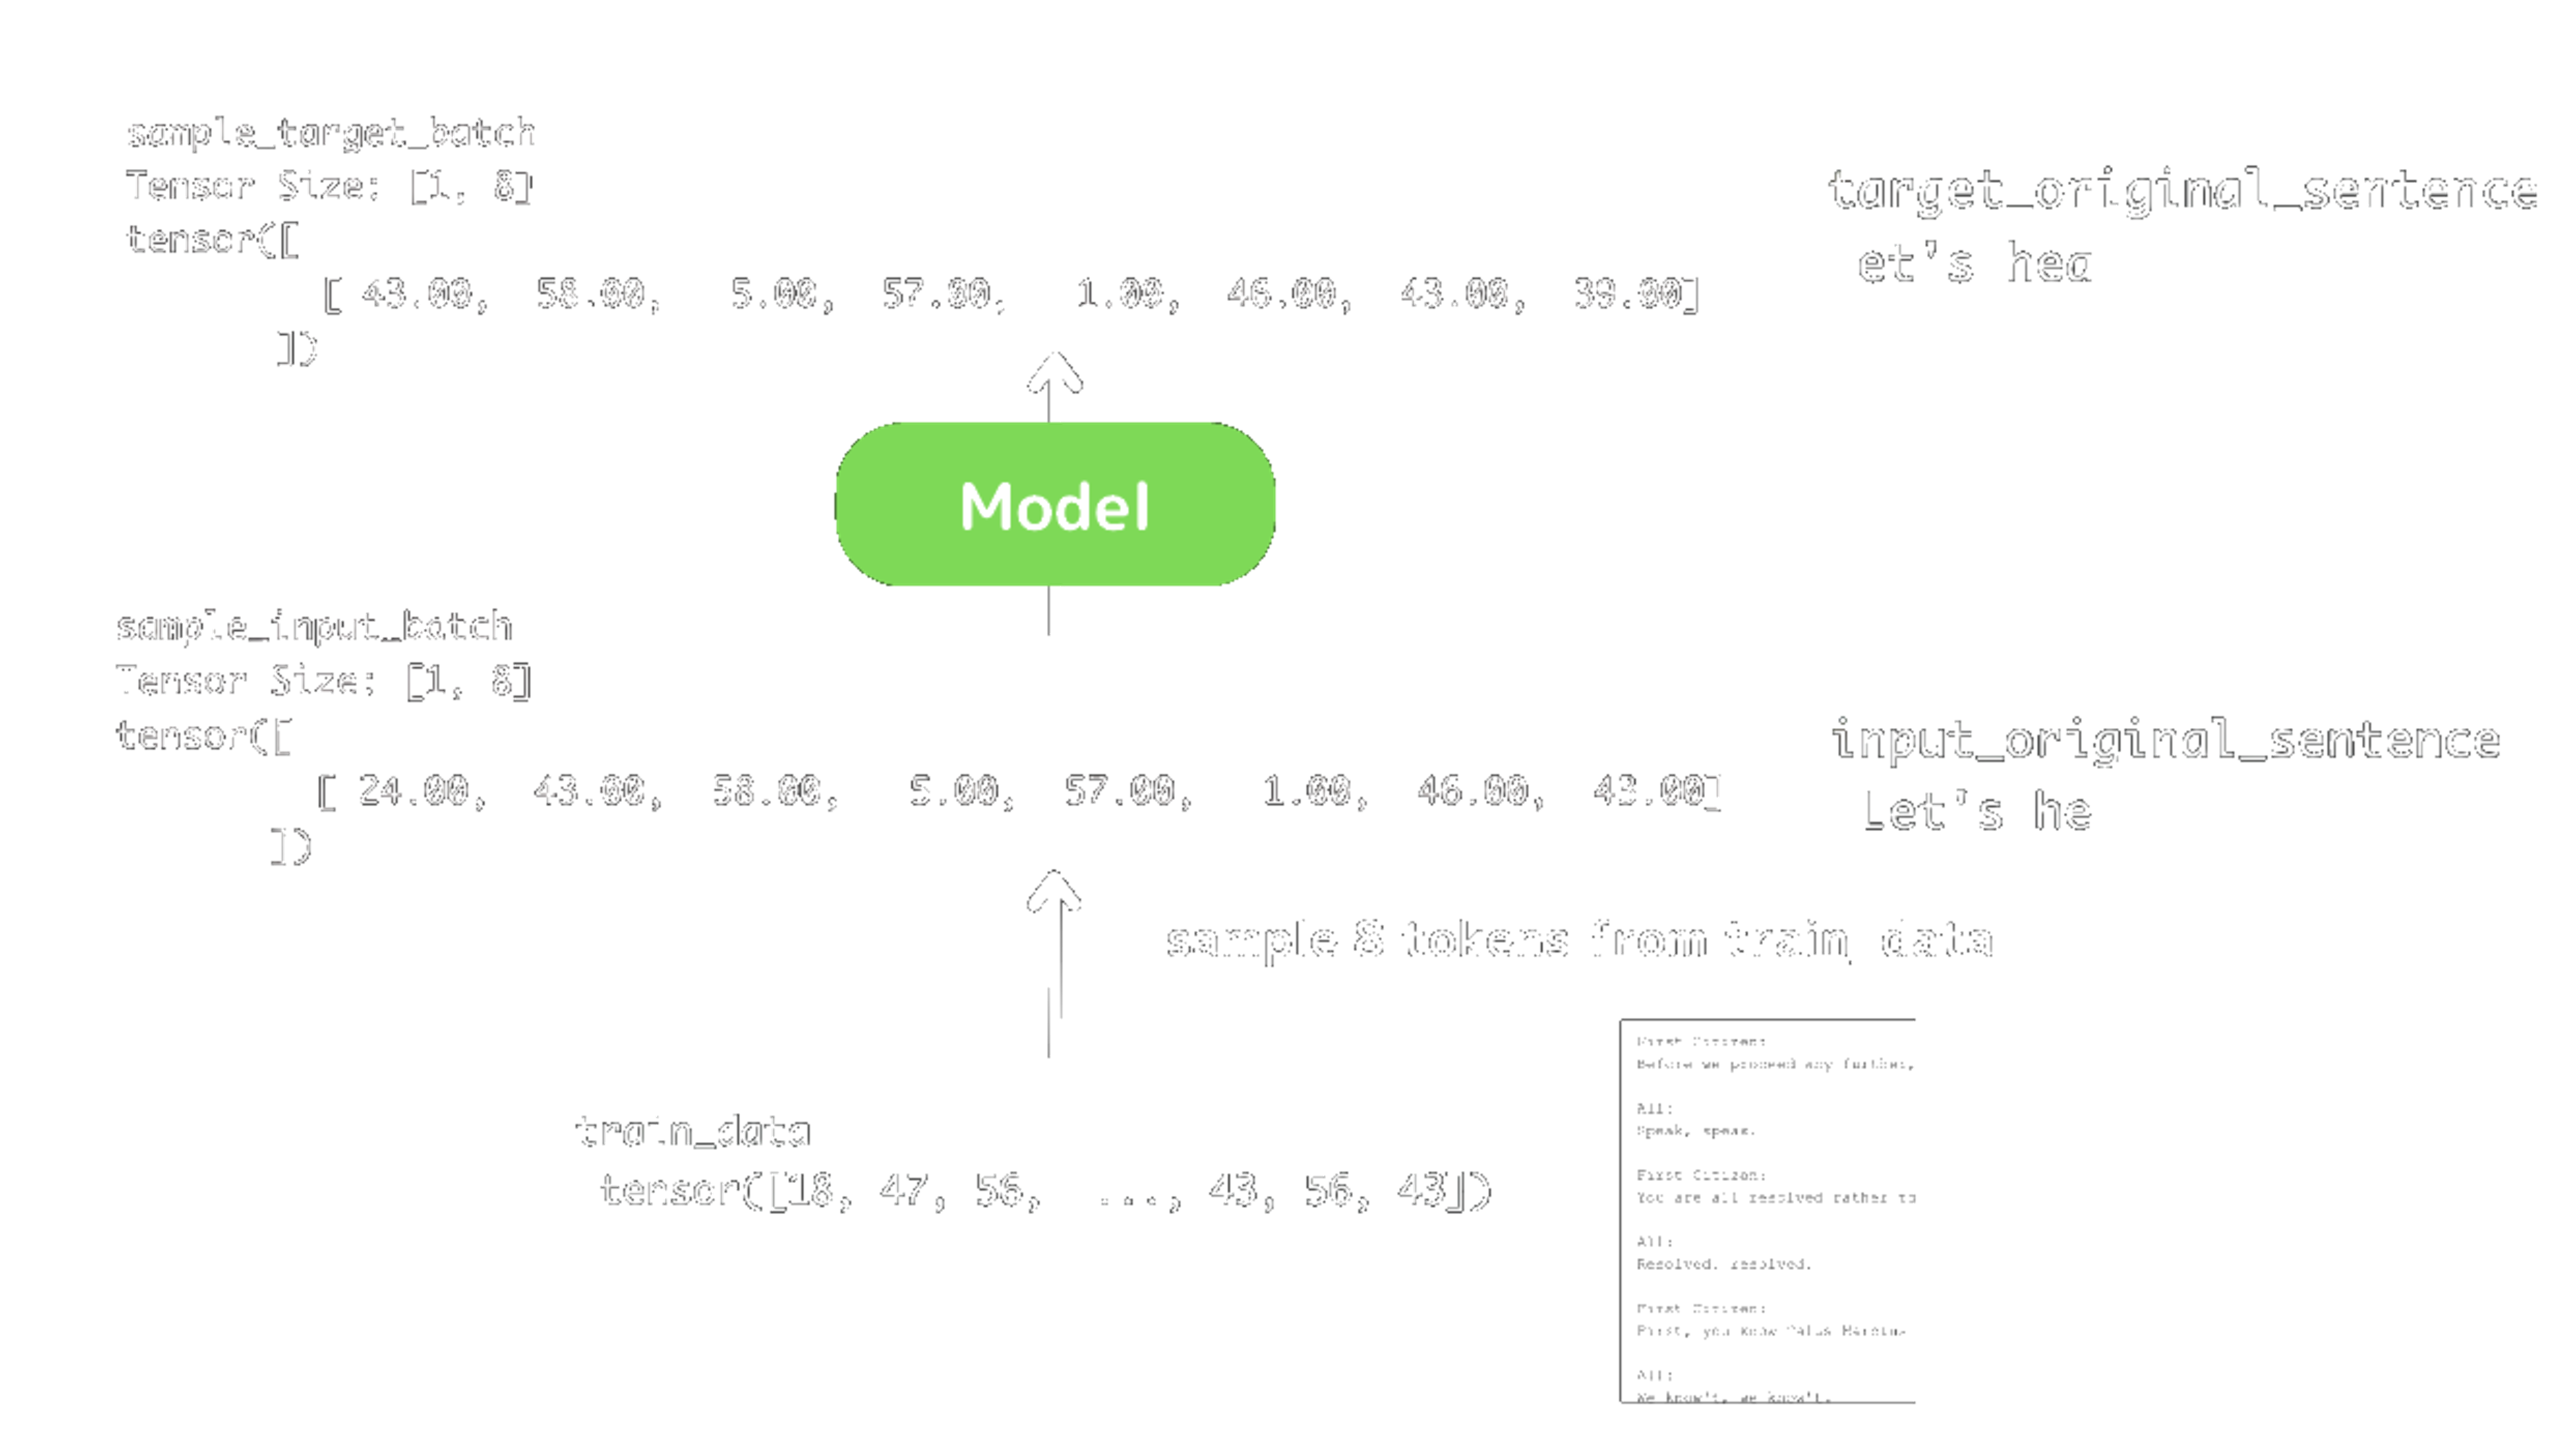

入力は8文字のシーケンスで、タスクはその次の文字を予測することです。  
8文字の入力それぞれに対して**8文字の出力を予測する**ことで、8文字の入力に対して1文字だけを予測する場合よりも効率的な学習が可能になります。

一度に処理するトークン（文字や単語）の数を「block size」と呼びます。<br>大きければ大きいほど、モデルはより長い文脈を学べます。<br>ただし、その分計算リソースも多く必要になります。

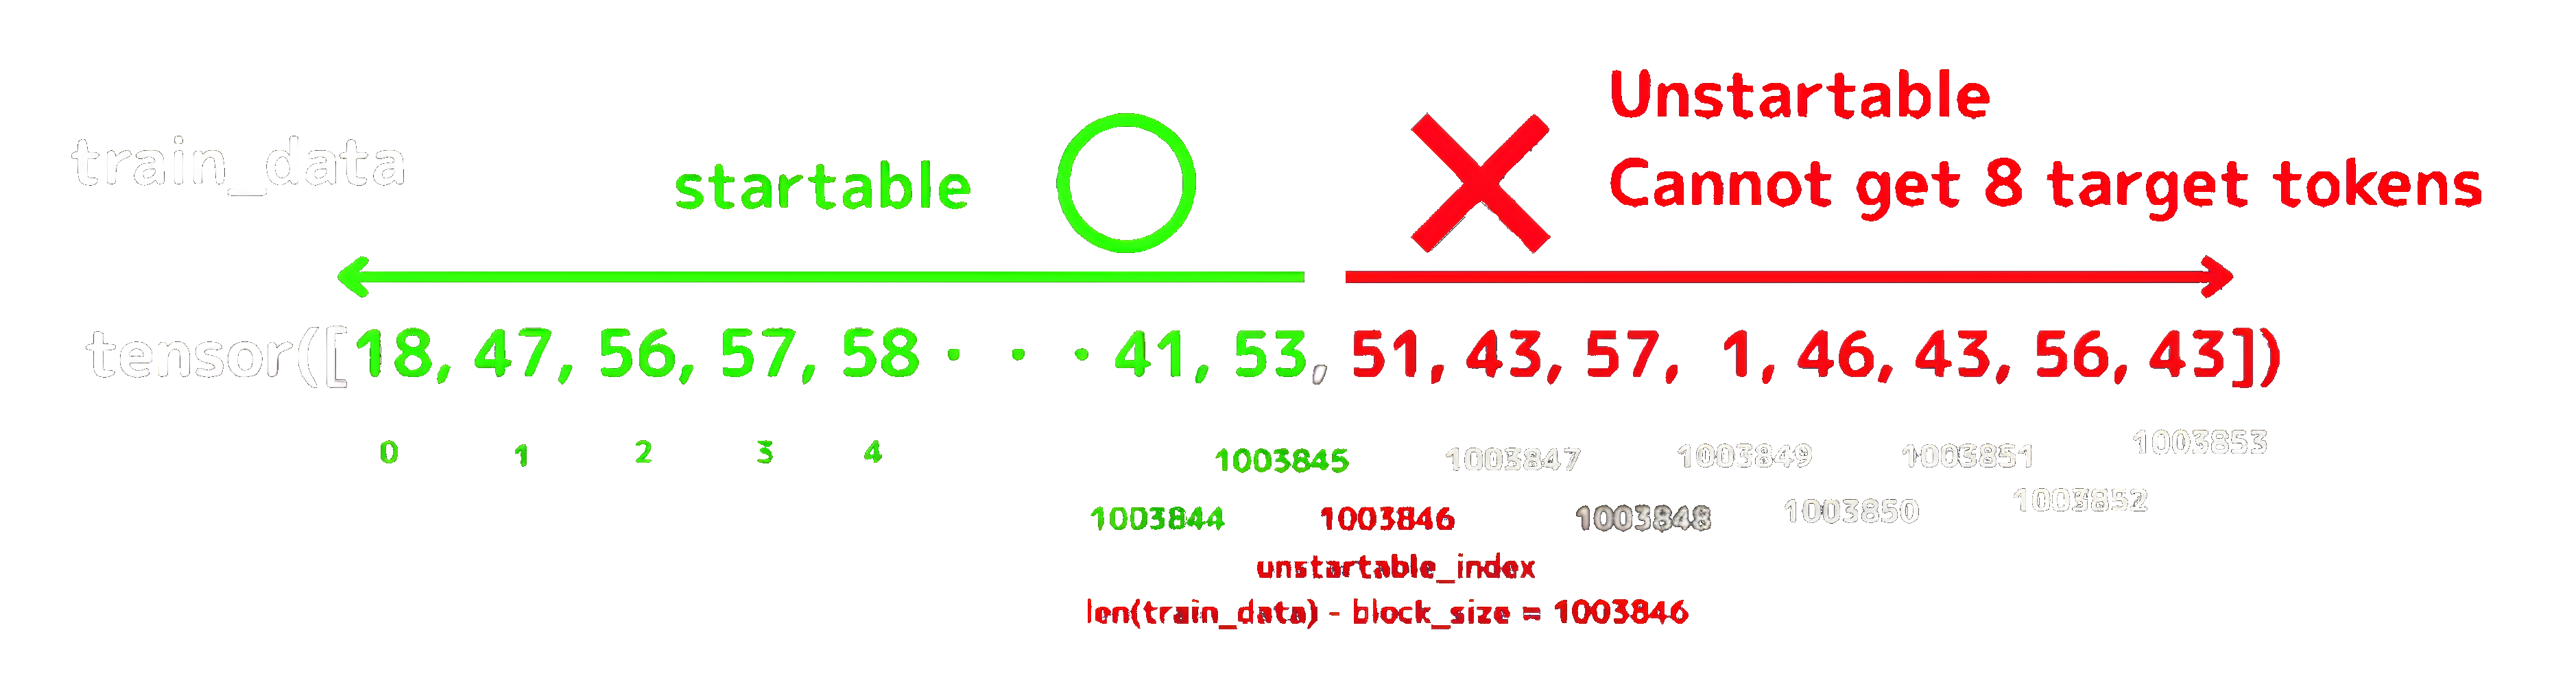

トレーニングデータからランダムに開始位置を選びます。<br>出力ターゲットを8つ取れるだけの余裕があることを確認しましょう。

In [ ]:
block_size = 8
unstartable_index = len(train_data) - block_size # TODO: 上図を使いunstartable_indexを計算する
print("起動不可インデックス", unstartable_index)

unstartable_index
 1003846


ランダムインデックスを生成する

```python
Function: torch.randint
Arguments: (low, high, shape ((1,)))
```
- `torch.randint(a, b, (1,))` は a（含む）から b（含まない）までの範囲でランダムに1つの整数を生成します。  
- `(1,)` によって、要素が1つだけのテンソルが返されます。

In [ ]:
torch.manual_seed(1337) # シード値は1337です
random_start_index = torch.randint(0, unstartable_index, (1,)) # TODO: 関数を適用する（下限、上限、形状）
print('シーケンス抽出開始位置：', random_start_index)

Sequence extraction start index: tensor([76049])


**`Check Point`**  
<label><input type="checkbox">  
シーケンス抽出開始インデックス: tensor([76049])  
</label>

上限の b は範囲に含まれません。`unstartable_index` をそのまま使えます。

`torch.manual_seed(1337)` はPyTorchの乱数生成を固定します。<br>
同じシードを使うと乱数の順番を再現できます。<br>
形状を `(4,)` と指定してみてください。これで4つの要素を持つテンソルが作れます。

In [ ]:
torch.manual_seed(1337) # シード値は1337です
random_start_index = torch.randint(0, unstartable_index, (4,)) # TODO: 関数を適用する（下限、上限、形状）
print('シーケンス抽出開始インデックス：', random_start_index)

Sequence extraction start index: tensor([ 76049, 234249, 934904, 560986])


**`Check Point`**  
<label><input type="checkbox">  
最初に生成された数値が1要素生成時と同じであることを確認した  
</label>

元の単一要素に戻りましょう。

In [ ]:
torch.manual_seed(1337)
batch_size = 1
random_start_index = torch.randint(0, unstartable_index, (batch_size,)) # TODO: バッチサイズ分のみ取得
print('配列抽出開始インデックス：', random_start_index)

Sequence extraction start index: tensor([76049])


1. `input_sequence`の作成（スライスを使用）

```python
データ: train_data
開始インデックス: random_start_index
終了インデックス: random_start_index + block_size
```
- `input_sequence`はモデルの入力として使われるシーケンスデータです。


In [ ]:
input_sequence = train_data[random_start_index: random_start_index + block_size] # TODO: データ適用 [開始インデックス:終了インデックス]
print("ランダム開始インデックス", random_start_index)
print_formatted_tensor("入力シーケンス", input_sequence)

random_start_index tensor([76049])
input_sequence
Tensor Size: [8]
tensor([
         24.00,  43.00,  58.00,   5.00,  57.00,   1.00,  46.00,  43.00
       ])


ID列をデコードすると、元の文字列が得られます。

In [ ]:
original_sentence = decode(input_sequence.tolist())
print("元の文", original_sentence)

original_sentence
 Let's he


**`Check Point`** <label><input type="checkbox"><br>
original_sentence<br>
Let's he<br>
</label>

2. `target_sequence` の作成（シフトしたスライス）

```python
Data: train_data
Start index: THINK_FOR_YOURSELF
End index: THINK_FOR_YOURSELF
```
- これは次のトークンを予測するためのターゲットシーケンスです。

In [ ]:
target_sequence = train_data[random_start_index + 1 : random_start_index + 1 + block_size] # TODO: データ適用 [開始インデックス: 終了インデックス]
print("ターゲットシーケンス")
print_formatted_tensor(target_sequence)

target_sequence
Tensor Size: [8]
tensor([
         43.00,  58.00,   5.00,  57.00,   1.00,  46.00,  43.00,  39.00
       ])


**Chapter 6: get_batch** <label><input type="checkbox"> Mark as done</label>

### **Section 7 クラスの定義**

In [ ]:
# モデル設定を保存する設定クラス
class ModelConfig:
    input_sequence_length = 8  # 入力データの長さ（系列長）
    batch_size = 1 # バッチサイズ（get_batchで同時に取得するサンプル数）
    device_type = 'cuda' if torch.cuda.is_available() else 'cpu'  # 使用するデバイス（GPUまたはCPU）

In [ ]:
config = ModelConfig() # ModelConfigインスタンスを作成しています。構成パラメータなし（コンストラクタ）。
print("config.input_sequence_length", config.input_sequence_length) # config.input_sequence_length
print("config.batch_size", config.batch_size ) # TODO: config.batch_size
print("config.device_type",config.device_type) # TODO: config.device_type

config.input_sequence_length 8
config.batch_size 1
config.device_type cpu


🔘 **Options**: 必要ない追加オプションがあるかもしれません。

`sorted` `enumerate` `self.ctoi` `self.encode` `self.split_data` `int` `float` `self.config` `self.config.input_sequence_length` `zip`


In [ ]:
"""
class DataLoader:
    def __init__(self, text, config):
        self.config = config  # 設定オブジェクト
        chars = ______(list(set(text)))  # TODO: ユニーク文字の並び替え
        self.ctoi = {char: index for index, char in enumerate(chars)}
        self.itoc = {index: char for index, char in _________(chars)} # TODO: 
        self.vocab_size = len(chars)

        # エンコードしてテンソルに変換する。
        # `__init__`外の他のメソッドや引数を呼ぶにはself.が必要です。
        self.data = torch.tensor(_________(text), dtype=torch.long) # TODO: 

        # 訓練用と検証用に分割する。
        # 引数がなくても`self.data`を使います。
        self.train_data, self.val_data = self.split_data()

    def encode(self, text):
        # 文字列をインデックス列に変換します。`self.`は他のメソッドや引数を呼ぶ際に必要です。
        return [___________[c] for c in text]  # TODO: 

    def decode(self, indices):
        return ''.join([self.itoc[i] for i in indices])

    def split_data(self):
        split_index = ___(0.9 * len(self.data))  # TODO: データの90％を訓練用に分割する点。
        return self.data[:split_index], self.data[split_index:]

    def get_batch(self, split):
        data = self.train_data if split == 'train' else self.val_data
         # 抽出開始インデックスを生成する
        start_indices = torch.randint(len(data) - ______________________, (self.config.batch_size,)) # TODO: 

        input_sequences = torch.stack([
            data[start_index:start_index + self.config.input_sequence_length]
            for start_index in start_indices
        ])
        target_sequences = torch.stack([
            data[start_index + 1:start_index + self.config.input_sequence_length + 1]
            for start_index in start_indices
        ])
        return input_sequences.to(self.config.device_type), target_sequences.to(self.config.device_type)
"""


"\nclass DataLoader:\n    def __init__(self, text, config):\n        self.config = config  # Configuration Object\n        chars = ______(list(set(text)))  # TODO: Sorting unique characters\n        self.ctoi = {char: index for index, char in enumerate(chars)}\n        self.itoc = {index: char for index, char in _________(chars)} # TODO: \n        self.vocab_size = len(chars)\n\n        # Encode and convert to tensor. \n        # `self.` is required to call other methods or arguments outside this `__init__` method.\n        self.data = torch.tensor(_________(text), dtype=torch.long) # TODO: \n\n        # Split into training/verification data. \n        # `self.data` is used by default even if no argument is specified.\n        self.train_data, self.val_data = self.split_data()  \n\n    def encode(self, text):\n        # Converts a string to an index column. `self.` is required to call other methods or arguments.\n        return [___________[c] for c in text]  # TODO: \n\n    def decode

In [ ]:
class DataLoader:
    def __init__(self, text, config):
        self.config = config  # 設定オブジェクト
        chars = sorted(list(set(text)))  # ユニーク文字をソートする
        self.ctoi = {char: index for index, char in enumerate(chars)}
        self.itoc = {index: char for index, char in enumerate(chars)}
        self.vocab_size = len(chars)

        # エンコードしてテンソルに変換する。
        # self. は他のメソッドや引数を呼び出すのに必要です。
        self.data = torch.tensor(self.encode(text), dtype=torch.long)

        # 訓練用と検証用に分割する。
        # 引数が指定されなくてもデフォルトでself.dataが使われます。
        self.train_data, self.val_data = self.split_data()

    def encode(self, text):
        # 文字列をインデックス列に変換します。self.で他のメソッドや引数を呼び出します。
        return [self.ctoi[c] for c in text]

    def decode(self, indices):
        return ''.join([self.itoc[i] for i in indices])

    def split_data(self):
        split_index = int(0.9 * len(self.data))  # データの90%を訓練用に分割する点。
        return self.data[:split_index], self.data[split_index:]

    def get_batch(self, split):
        data = self.train_data if split == 'train' else self.val_data
        start_indices = torch.randint(len(data) - self.config.input_sequence_length, (self.config.batch_size,)) # 抽出開始インデックスを生成

        input_sequences = torch.stack([
            data[start_index:start_index + self.config.input_sequence_length]
            for start_index in start_indices
        ])
        target_sequences = torch.stack([
            data[start_index + 1:start_index + self.config.input_sequence_length + 1]
            for start_index in start_indices
        ])
        return input_sequences.to(self.config.device_type), target_sequences.to(self.config.device_type)


<details>
<summary>クリックして答えを表示/非表示</summary>

```python
class DataLoader:
    def __init__(self, text, config):
        self.config = config  # 設定オブジェクト
        chars = sorted(list(set(text)))  # ユニークな文字をソート
        self.ctoi = {char: index for index, char in enumerate(chars)}
        self.itoc = {index: char for index, char in enumerate(chars)}
        self.vocab_size = len(chars)
        self.data = torch.tensor(self.encode(text), dtype=torch.long)  # エンコードしてテンソルに変換。self.は他メソッドや引数を呼ぶために必要。
        self.train_data, self.val_data = self.split_data()  # 訓練データと検証データを分割。引数なしなら関数定義通りself.dataを使う。

    def encode(self, text):
        return [self.ctoi[c] for c in text]  # 文字列をインデックスの列に変換。self.が必要。

    def decode(self, indices):
        return ''.join([self.itoc[i] for i in indices])

    def split_data(self):
        split_index = int(0.9 * len(self.data))  # データの90%を訓練用にする分割点
        return self.data[:split_index], self.data[split_index:]

    def get_batch(self, split):
        data = self.train_data if split == 'train' else self.val_data
        start_indices = torch.randint(len(data) - self.config.input_sequence_length, (self.config.batch_size,)) # 抜き出し開始位置をランダムに生成

        input_sequences = torch.stack([
            data[start_index:start_index + self.config.input_sequence_length]
            for start_index in start_indices
        ])
        target_sequences = torch.stack([
            data[start_index + 1:start_index + self.config.input_sequence_length + 1]
            for start_index in start_indices
        ])
        return input_sequences.to(self.config.device_type), target_sequences.to(self.config.device_type)
```

In [ ]:
with open("input.txt", 'r', encoding = 'utf-8') as f:
    full_text = f.read() # TODO: Shakespeareファイルの全文を読み込み、full_textに格納する

```python
Class: DataLoader
引数: full_text, config
```

```
インスタンス = Class(引数)
```

In [ ]:
# ModelConfigインスタンスを作成中。設定パラメータなし（コンストラクタなし）。
config = ModelConfig()

# sample_textとconfigを使うDataLoaderのインスタンスを作成する。
loader = DataLoader(full_text, config) # TODO: クラス名（引数: full_text, config）

# 結果を確認する
print("文字からインデックスへの辞書:\n", loader.ctoi)
print("\n文字へのインデックス辞書:\n", loader.itoc)
print(f"\nvocabulary size: {loader.vocab_size}")
print(f"\nencoded data:\n {loader.data}")
print("\n学習データ:\n", loader.train_data)
print("検証データ:", loader.val_data)

Character to index dictionary:
 {'\n': 0, ' ': 1, '!': 2, '$': 3, '&': 4, "'": 5, ',': 6, '-': 7, '.': 8, '3': 9, ':': 10, ';': 11, '?': 12, 'A': 13, 'B': 14, 'C': 15, 'D': 16, 'E': 17, 'F': 18, 'G': 19, 'H': 20, 'I': 21, 'J': 22, 'K': 23, 'L': 24, 'M': 25, 'N': 26, 'O': 27, 'P': 28, 'Q': 29, 'R': 30, 'S': 31, 'T': 32, 'U': 33, 'V': 34, 'W': 35, 'X': 36, 'Y': 37, 'Z': 38, 'a': 39, 'b': 40, 'c': 41, 'd': 42, 'e': 43, 'f': 44, 'g': 45, 'h': 46, 'i': 47, 'j': 48, 'k': 49, 'l': 50, 'm': 51, 'n': 52, 'o': 53, 'p': 54, 'q': 55, 'r': 56, 's': 57, 't': 58, 'u': 59, 'v': 60, 'w': 61, 'x': 62, 'y': 63, 'z': 64}

Index to Character Dictionary:
 {0: '\n', 1: ' ', 2: '!', 3: '$', 4: '&', 5: "'", 6: ',', 7: '-', 8: '.', 9: '3', 10: ':', 11: ';', 12: '?', 13: 'A', 14: 'B', 15: 'C', 16: 'D', 17: 'E', 18: 'F', 19: 'G', 20: 'H', 21: 'I', 22: 'J', 23: 'K', 24: 'L', 25: 'M', 26: 'N', 27: 'O', 28: 'P', 29: 'Q', 30: 'R', 31: 'S', 32: 'T', 33: 'U', 34: 'V', 35: 'W', 36: 'X', 37: 'Y', 38: 'Z', 39: 'a', 40: 'b

**`Check Point`**  
<label><input type="checkbox"> full_textに合ったDataloaderインスタンスが作成されていることを確認する<br> 語彙数が65であることを必ず確認してください
<br></label>

```python
インスタンス: loader
メソッド: get_batch
引数: split = 'train'

インスタンス.メソッド(引数)
```

In [ ]:
torch.manual_seed(1337)

# 学習用のバッチデータを取得する。
sample_input_batch, sample_target_batch = loader.get_batch(split='train')
print_formatted_tensor("サンプル入力バッチ", sample_input_batch)

sample_input_batch
Tensor Size: [1, 8]
tensor([
         [ 24.00,  43.00,  58.00,   5.00,  57.00,   1.00,  46.00,  43.00]
       ])


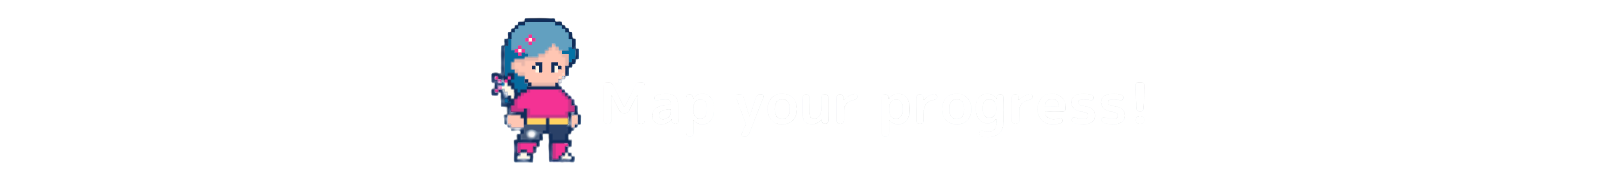

In [ ]:
print_formatted_tensor("サンプル対象バッチ", sample_target_batch)

sample_target_batch
Tensor Size: [1, 8]
tensor([
         [ 43.00,  58.00,   5.00,  57.00,   1.00,  46.00,  43.00,  39.00]
       ])


In [ ]:
# loaderインスタンスのdecodeメソッドで入力データのIDを文字に変換する
input_original_sentence = loader.decode(sample_input_batch[0].tolist())
print("元の入力文", input_original_sentence)

target_original_sentence = loader.decode(sample_target_batch[0].tolist())
print("\n元の文章\n", target_original_sentence)

input_original_sentence
 Let's he

target_original_sentence
 et's hea


**Section 7: Define a Class** <label><input type="checkbox"> Mark as Done</label>

**Chapter 1: Dataloader Class** <label><input type="checkbox"> Mark as Done</label>